In [15]:
import numpy as np
import pandas as pd
from modnet.models import MODNetModel
from modnet.preprocessing import MODData
from modnet.featurizers.presets import CompositionOnlyMatminer2023Featurizer
import matplotlib.pyplot as plt 
from pymatgen.core import Composition

from matminer.utils.warnings import IMPUTE_NAN_WARNING
import warnings
warnings.filterwarnings("ignore", message=f".*{IMPUTE_NAN_WARNING}")
warnings.filterwarnings("ignore", f".*(impute_nan=False).*", category=UserWarning)

featurizer = CompositionOnlyMatminer2023Featurizer()
featurizer.composition_featurizers = [f for f in featurizer.composition_featurizers if f.__class__.__name__ != "IonProperty"]

In [16]:
df = pd.read_csv('data/df_grouped_formula_complete_dataset.csv')

df["composition"] = df['formula'].map(Composition)
df.rename(columns={'target':'gap expt'}, inplace=True)
df.drop(columns=['index', 'formula'], inplace=True)
df.dropna(subset=['gap expt'], inplace=True)
df = df[['composition', 'gap expt']]
df.head()

,composition,gap expt
0,"(Ag, In, Zn, S)",2.30
1,"(Ag, Cu, In, Ga, Se)",0.07
2,"(Ag, Eu, Ge, S)",2.14
3,"(Ag, Pb, Ge, S)",1.83
4,"(Ag, Pb, Ge, Se)",1.51


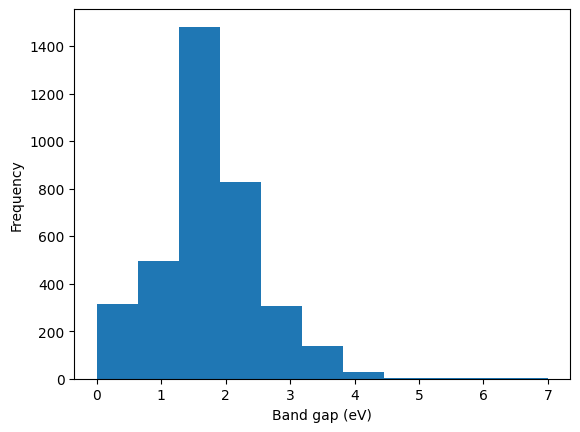

In [17]:
fig, ax = plt.subplots(facecolor="w")
ax.hist(df["gap expt"], bins=11, density=False)
ax.set_ylabel("Frequency")
ax.set_xlabel("Band gap (eV)")
plt.show()

In [19]:
# This instantiates the MODData
data = MODData(
    materials=df["composition"], # you can provide composition objects to MODData
    targets=df["gap expt"], 
    target_names=["gap_expt_eV"],
    featurizer=featurizer
)

2025-03-17 15:41:48,448 - modnet - INFO - Loaded CompositionOnlyMatminer2023Featurizer featurizer.


In [20]:
data.featurize()

2025-03-17 15:41:51,593 - modnet - INFO - Computing features, this can take time...
2025-03-17 15:41:51,594 - modnet - INFO - Applying composition featurizers...
2025-03-17 15:41:51,598 - modnet - INFO - Applying featurizers [AtomicOrbitals(), AtomicPackingEfficiency(), BandCenter(), ElementFraction(), ElementProperty(data_source=<matminer.utils.data.MagpieData object at 0x71be110ac9a0>,
                features=['Number', 'MendeleevNumber', 'AtomicWeight',
                          'MeltingT', 'Column', 'Row', 'CovalentRadius',
                          'Electronegativity', 'NsValence', 'NpValence',
                          'NdValence', 'NfValence', 'NValence', 'NsUnfilled',
                          'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled',
                          'GSvolume_pa', 'GSbandgap', 'GSmagmom',
                          'SpaceGroupNumber'],
                stats=['minimum', 'maximum', 'range', 'mean', 'avg_dev',
                       'mode']), Miedema(ss_typ

MultipleFeaturizer:  83%|████████▎ | 2980/3605 [19:46<02:55,  3.56it/s]  /home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:216: UserWarning: No data available for atomic_orbitals for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
MultipleFeaturizer:  83%|████████▎ | 3010/3605 [19:49<01:29,  6.63it/s]/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:216: UserWarning: No data available for atomic_orbitals for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
MultipleFeaturizer:  86%|████████▌ | 3100/3605 [20:13<01:53,  4.44it/s]/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:216: UserWarning: No data available for atomic_orbitals for Am
  warnings.warn(f"No data available for {item} for {self.symbol}")
MultipleFeaturizer: 100%|██████████| 3605/3605 [22:04<00:00,  2.72it/s]


2025-03-17 16:04:09,405 - modnet - INFO - Data has successfully been featurized!


In [32]:
from sklearn.model_selection import train_test_split
split = train_test_split(range(100), test_size=0.1, random_state=1234)
train, test = data.split(split)

In [33]:
train.feature_selection(n=142)

/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


2025-03-17 16:13:34,747 - modnet - INFO - Multiprocessing on 1 workers.
2025-03-17 16:13:34,748 - modnet - INFO - Computing "self" MI (i.e. information entropy) of features


100%|██████████| 283/283 [00:00<00:00, 575.63it/s]

2025-03-17 16:13:35,253 - modnet - INFO - Computing cross NMI between all features...



100%|██████████| 11628/11628 [00:19<00:00, 598.61it/s]

2025-03-17 16:13:54,754 - modnet - INFO - Starting target 1/1: gap_expt_eV ...
2025-03-17 16:13:54,755 - modnet - INFO - Computing mutual information between features and target...



/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


2025-03-17 16:13:55,251 - modnet - INFO - Computing optimal features...
2025-03-17 16:13:57,341 - modnet - INFO - Selected 50/142 features...
2025-03-17 16:13:58,650 - modnet - INFO - Selected 100/142 features...
2025-03-17 16:13:59,083 - modnet - INFO - Done with target 1/1: gap_expt_eV.
2025-03-17 16:13:59,084 - modnet - INFO - Merging all features...
2025-03-17 16:13:59,084 - modnet - INFO - Done.


In [34]:
model = MODNetModel([[['gap_expt_eV']]],
                    weights={'gap_expt_eV':1},
                    num_neurons = [[256], [128], [16], [16]],
                    n_feat = 142,
                    act =  "elu"
                   )

In [35]:
model.fit(train,
          val_fraction = 0.1,
          lr = 0.0002,
          batch_size = 64,
          loss = 'mae',
          epochs = 100,
          verbose = 1,
         )


model.save("models/modnet_gap_expt.tgz")

epoch 0: loss: 1.700, val_loss:0.945 val_mae:0.945
epoch 1: loss: 1.284, val_loss:0.588 val_mae:0.588
epoch 2: loss: 0.946, val_loss:0.391 val_mae:0.391
epoch 3: loss: 0.747, val_loss:0.548 val_mae:0.548
epoch 4: loss: 0.666, val_loss:0.718 val_mae:0.718
epoch 5: loss: 0.671, val_loss:0.788 val_mae:0.788
epoch 6: loss: 0.695, val_loss:0.785 val_mae:0.785
epoch 7: loss: 0.665, val_loss:0.722 val_mae:0.722
epoch 8: loss: 0.607, val_loss:0.628 val_mae:0.628
epoch 9: loss: 0.554, val_loss:0.542 val_mae:0.542
epoch 10: loss: 0.530, val_loss:0.477 val_mae:0.477
epoch 11: loss: 0.531, val_loss:0.441 val_mae:0.441
epoch 12: loss: 0.527, val_loss:0.441 val_mae:0.441
epoch 13: loss: 0.509, val_loss:0.474 val_mae:0.474
epoch 14: loss: 0.493, val_loss:0.510 val_mae:0.510
epoch 15: loss: 0.481, val_loss:0.531 val_mae:0.531
epoch 16: loss: 0.470, val_loss:0.540 val_mae:0.540
epoch 17: loss: 0.462, val_loss:0.537 val_mae:0.537
epoch 18: loss: 0.447, val_loss:0.517 val_mae:0.517
epoch 19: loss: 0.433,

In [36]:
pred = model.predict(test)
pred.head()

1/1 [==============================] - 0s 72ms/step


,gap_expt_eV
id40,1.924583
id35,2.476603
id81,0.349069
id61,1.585564
id98,2.379502


In [38]:
pred

,gap_expt_eV
id40,1.924583
id35,2.476603
id81,0.349069
id61,1.585564
id98,2.379502
id68,2.256349
id85,0.962378
id27,1.630686
id39,2.301557
id42,2.229647


In [37]:
mae_test = np.absolute(pred.values-test.df_targets.values).mean()
print(f'mae: {mae_test}')

mae: 0.6853056003994412


In [39]:
data